# Distance-Based Classification: 1-NN on Sonar Dataset (Rock vs. Metal Data)

**Name**: Hygen Amoniku
            
   
---


## Introduction
In this task, a simple 1-Nearest Neighbor (1-NN) classifier is implemented for the Sonar dataset. The classification is based on Minkowski distance with exponent q. The classifier is specifically run for q=1 (Manhattan distance) and q=2 (Euclidean distance). After predicting on the test set, we calculate and display accuracy, precision, recall, and F1-score for the positive class "M".

## Importing Libraries

In [1]:
# For data manipulation, analysis, and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# show plots inside the notebook  
%matplotlib inline

## Loading the Sonar training and test datasets

In [2]:
# Load CSV
train_data = pd.read_csv('sonar_train.csv', header=0)
test_data = pd.read_csv('sonar_test.csv', header=0)

# Check of shapes and columns
print("Datasets shape")
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Datasets shape
Train shape: (139, 61)
Test shape: (69, 61)


In [3]:
# First few rows of the train set
train_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
1,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M
2,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
3,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R


### Separating features (A1..A60) and label (Class)

In [4]:
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].values

X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].values

#confirm shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (139, 60)
y_train shape: (139,)
X_test shape: (69, 60)
y_test shape: (69,)


 ### Defining the Minkowski Distance Function


In [5]:
def minkowski_distance(x, y, q=2):
    
    # Computes Minkowski distance between two vectors x and y with exponent q.
    # For q=1 => Manhattan distance
    # For q=2 => Euclidean distance
    
    # Calculate the sum of |xᵢ - yᵢ|^q
    diff_power_q = np.abs(x - y) ** q
    sum_diff_power_q = np.sum(diff_power_q)
    
    # Take the q-th root
    distance = sum_diff_power_q ** (1.0 / q)
    return distance


## Implementing the 1-Nearest Neighbor Classifier

In [6]:
def one_nn_classifier(X_test, X_train, y_train, q=2):
    # Classify each row in X_test by 1-NN with Minkowski distance of power q.
    predictions = []
    for x_test_instance in X_test:
        min_distance = float('inf')
        predicted_label = None
            
        # Compare with each training instance
        for i in range(len(X_train)):
            dist = minkowski_distance(x_test_instance, X_train[i], q=q)
            if dist < min_distance:
                min_distance = dist
                predicted_label = y_train[i]
                
        predictions.append(predicted_label)
    return np.array(predictions)


## Running and evaluating 1-NN for q=1 (Manhattan) and q=2 (Euclidean)

1-NN with Manhattan Distance (q=1)
Accuracy :  0.884
Precision:  0.854
Recall   :  0.946
F1-score :  0.897


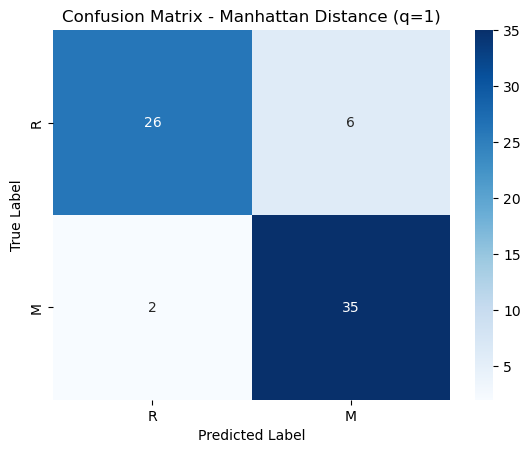


1-NN with Euclidean Distance (q=2)
Accuracy :  0.899
Precision:  0.857
Recall   :  0.973
F1-score :  0.911


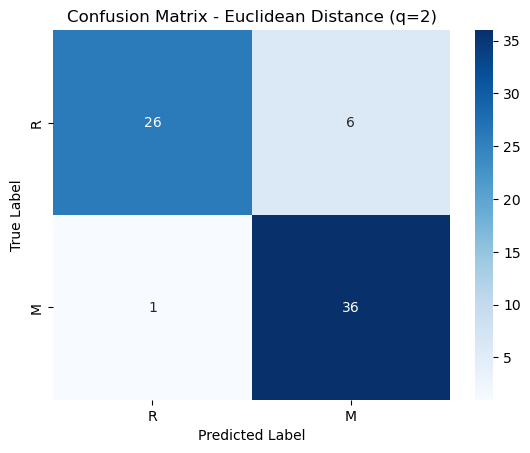

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to evaluate performance and show confusion matrix
def evaluate_performance(y_true, y_pred, positive_class='M', title="Confusion Matrix"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=positive_class)
    rec = recall_score(y_true, y_pred, pos_label=positive_class)
    f1 = f1_score(y_true, y_pred, pos_label=positive_class)

    # Print metrics
    print(f"Accuracy :  {acc:.3f}")
    print(f"Precision:  {prec:.3f}")
    print(f"Recall   :  {rec:.3f}")
    print(f"F1-score :  {f1:.3f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=['R', 'M'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['R', 'M'], yticklabels=['R', 'M'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

    return acc, prec, rec, f1

# Manhattan (q=1)
print("1-NN with Manhattan Distance (q=1)")
y_pred_manhattan = one_nn_classifier(X_test, X_train, y_train, q=1)
evaluate_performance(y_test, y_pred_manhattan, positive_class='M', title="Confusion Matrix - Manhattan Distance (q=1)")
print("")

# Euclidean (q=2)
print("1-NN with Euclidean Distance (q=2)")
y_pred_euclidean = one_nn_classifier(X_test, X_train, y_train, q=2)
evaluate_performance(y_test, y_pred_euclidean, positive_class='M', title="Confusion Matrix - Euclidean Distance (q=2)")
print("")



Both distance metrics produced strong performance, indicating that a simple 1-NN approach can already separate rocks (`R`) from metal cylinders (`M`) effectively under these features. Euclidean distance performed slightly better than Manhattan distance on this dataset, suggesting that the shape of the Sonar data fits well with how Euclidean distance measures similarity.